In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.matlib as nmat
import copy

In [2]:
def p1(k):
    return np.sin(4 * np.pi * k)

In [3]:
def G(k):
    return np.sin(k*k - 2*k + 3)

In [4]:
R = np.array([0,1,6])
k1 = np.arange(0,1,0.025)
k2 = np.arange(-0.05,4.25,0.025)

In [5]:
def get_signal(k1, k2, R):
    p  = p1(k1)
    t1 = np.full_like(p, -1)
    t2 = np.full_like(k2, 1)
    t2 = t2.reshape(1, t2.size)
    g = G(k2)
    g = g.reshape(1, g.size)
    
    P = np.concatenate((nmat.repmat(p, 1, R[0]), g,
                        nmat.repmat(p, 1, R[1]), g,
                        nmat.repmat(p, 1, R[2]), g), axis=1).reshape(-1, 1)

    T = np.concatenate((nmat.repmat(t1, 1, R[0]), t2,
                        nmat.repmat(t1, 1, R[1]), t2,
                        nmat.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)
    return P, T

In [6]:
def plot_signal(p, t):
    plt.figure(figsize=(16, 7))
    plt.plot(p.ravel(), label='Input')
    plt.plot(t.ravel(), label='Target')
    plt.legend()
    plt.show()

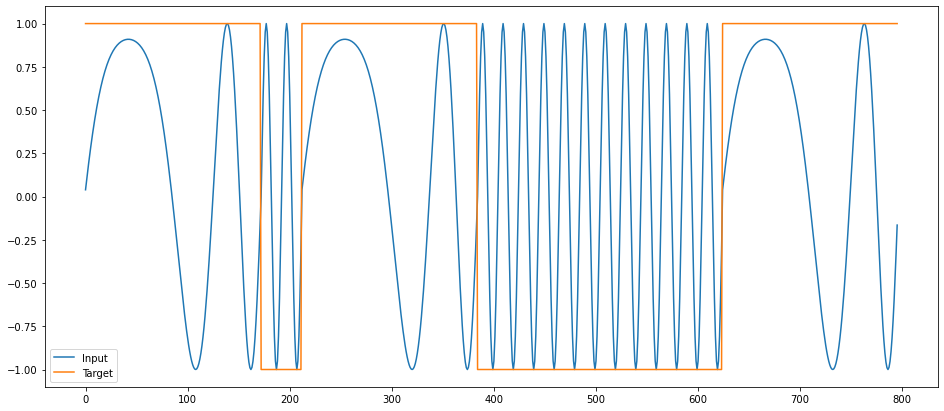

In [7]:
p, t = get_signal(k1, k2, R)
plot_signal(p, t)

## Сеть Элмана

In [8]:
import neurolab as nl

In [9]:
def get_elman(p, t):
    elman = nl.net.newelm([[-2, 2]], [15, 1], [nl.trans.TanSig(), nl.trans.PureLin()])
    elman.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    elman.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    elman.init()
    
    error = elman.train(p, t, epochs=2000, show=100, goal=0.001)
    result = elman.sim(p)
    return result, error

In [10]:
result, error = get_elman(p, t)

Epoch: 100; Error: 0.9100203587713361;
Epoch: 200; Error: 0.8953506898005927;
Epoch: 300; Error: 0.7569980946760008;
Epoch: 400; Error: 0.8475534756096583;
Epoch: 500; Error: 1.0125947391024253;
Epoch: 600; Error: 0.8421252208795876;
Epoch: 700; Error: 0.978107316106105;
Epoch: 800; Error: 0.9014896754110202;
Epoch: 900; Error: 1.11997240259207;
Epoch: 1000; Error: 0.8567752052884784;
Epoch: 1100; Error: 0.8598566983578715;
Epoch: 1200; Error: 0.9326844134908566;
Epoch: 1300; Error: 0.8395713372090182;
Epoch: 1400; Error: 0.9316229906014575;
Epoch: 1500; Error: 0.7435345638108786;
Epoch: 1600; Error: 0.6500703313635429;
Epoch: 1700; Error: 0.6967254744626356;
Epoch: 1800; Error: 0.6635550832208355;
Epoch: 1900; Error: 0.6092331816353712;
Epoch: 2000; Error: 0.6152181551779358;
The maximum number of train epochs is reached


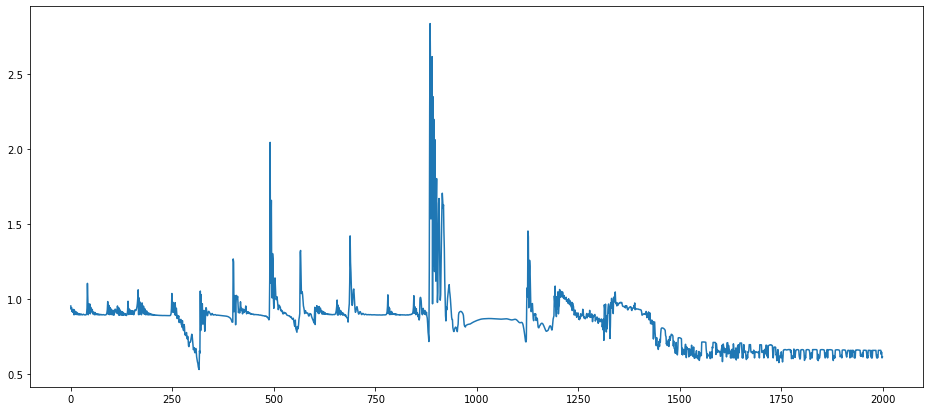

In [11]:
plt.figure(figsize=(16,7))
plt.plot(error)

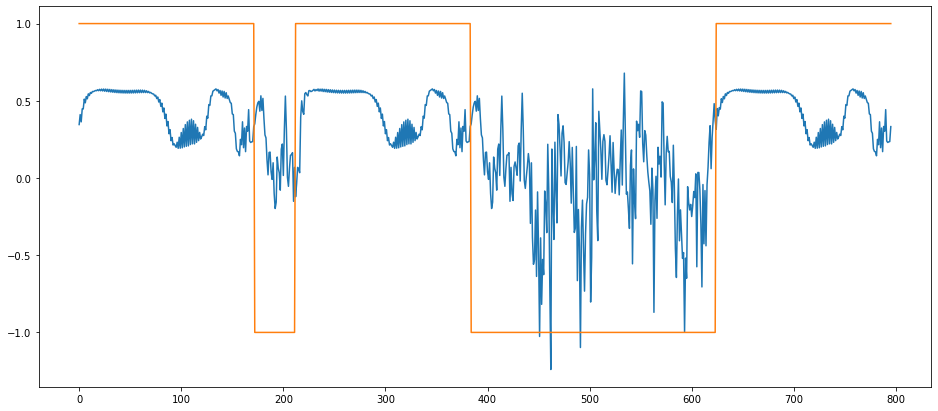

In [12]:
plt.figure(figsize=(16,7))
plt.plot(result.ravel(), label='Net output')
plt.plot(t.ravel(), label='Target')

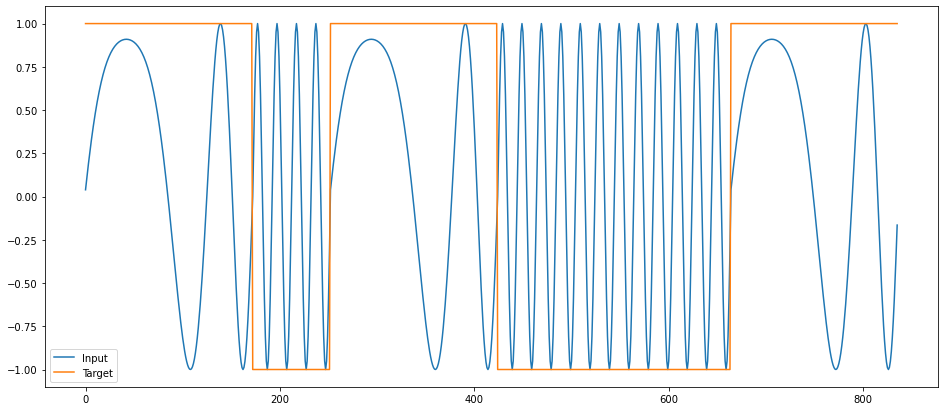

In [13]:
p, t = get_signal(k1, k2, [0, 2, 6])
plot_signal(p, t)

In [14]:
result, error = get_elman(p, t)

Epoch: 100; Error: 0.9238816114884454;
Epoch: 200; Error: 0.9272058860292026;
Epoch: 300; Error: 1.9287496471565462;
Epoch: 400; Error: 1.018081169673052;
Epoch: 500; Error: 0.9374792826888891;
Epoch: 600; Error: 0.5728589484150124;
Epoch: 700; Error: 1.4826050504414952;
Epoch: 800; Error: 0.7949064718772854;
Epoch: 900; Error: 0.9594280804815627;
Epoch: 1000; Error: 0.9260351471231743;
Epoch: 1100; Error: 0.9259398576636246;
Epoch: 1200; Error: 0.9271795339265536;
Epoch: 1300; Error: 0.8309789126111209;
Epoch: 1400; Error: 0.5695862261068652;
Epoch: 1500; Error: 0.45749718134798734;
Epoch: 1600; Error: 0.9049225749410151;
Epoch: 1700; Error: 0.8688755625211859;
Epoch: 1800; Error: 0.8613152940171277;
Epoch: 1900; Error: 0.8640075288102124;
Epoch: 2000; Error: 1.0450773082358562;
The maximum number of train epochs is reached


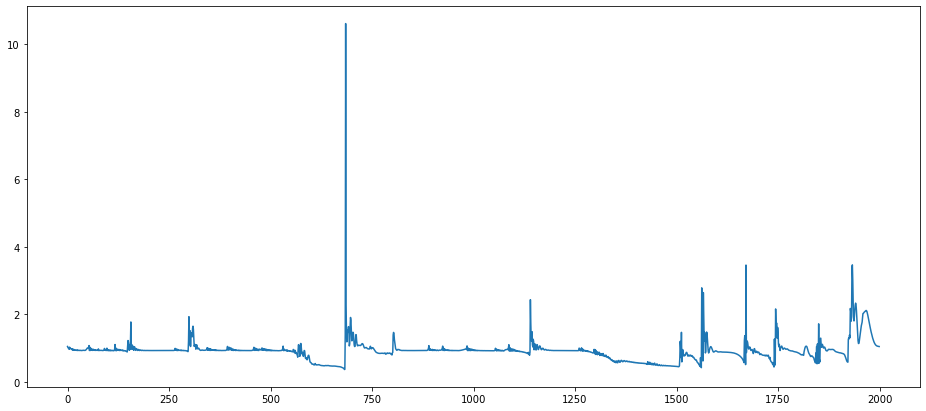

In [15]:
plt.figure(figsize=(16,7))
plt.plot(error)

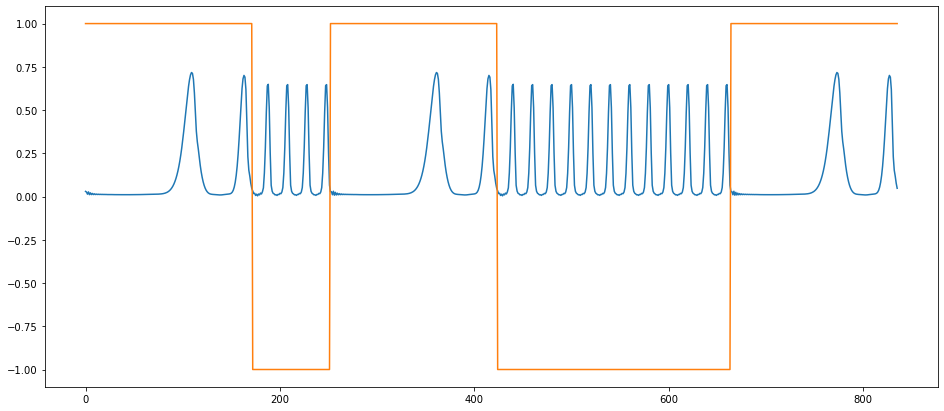

In [16]:
plt.figure(figsize=(16,7))
plt.plot(result.ravel(), label='Net output')
plt.plot(t.ravel(), label='Target')

## Сеть Хопфилда

In [17]:
NUMBERS = {
    3: np.matrix([
        0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 0
    ]),
    4: np.matrix([
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0
    ]),
    2: np.matrix([
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0
    ])
}

In [18]:
def plot_number(number):
    for row in number.reshape(12, 10).tolist():
        print(' '.join(' #'[val] for val in row))
    print()

In [19]:
plot_number(NUMBERS[2])
plot_number(NUMBERS[3])
plot_number(NUMBERS[4])

  # # # # # # #    
  # # # # # # #    
            # #    
            # #    
            # #    
  # # # # # # #    
  # # # # # # #    
  # #              
  # #              
  # #              
  # # # # # # #    
  # # # # # # #    

    # # # #        
    # # # # #      
          # # #    
          # # #    
          # # #    
      # # # #      
      # # # #      
          # # #    
          # # #    
          # # #    
    # # # # #      
    # # # #        

  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # # # # # # # #  
  # # # # # # # #  
              # #  
              # #  
              # #  
              # #  
              # #  



In [20]:
def noise_data(number, M):
    tmp = copy.copy(number.A)
    for i in range(tmp.shape[1]):
        r = np.random.randint(1, 100)
        if r < M:
            if tmp[0][i] == 0:
                tmp[0][i] = 1
            else:
                tmp[0][i] = 0
    return np.matrix(tmp)

In [21]:
plot_number(noise_data(NUMBERS[2], 20))
plot_number(noise_data(NUMBERS[3], 20))
plot_number(noise_data(NUMBERS[4], 20))

#     # #   # # #  
#   # #   # # #    
            # #    
          # # # #  
          # # #    
      # # # #     #
# # # # #   # #    
  # # # #   # #    
    #           #  
  # #              
  # # # #     # #  
  # # # # # # # # #

    # # # #        
    # #            
          #   # #  
# # # #   # # #    
          # # #   #
      # # # #   #  
    #   # # #      
          # # #    
  #       # # #    
#             #    
  # # # # # #      
    # #   #     #  

    #         # #  
# # #         # #  
  # #         #    
  # #   #     # #  
  # #       #   # #
  # # # # #   #    
  # # # #   # # #  
              # # #
          #   # # #
#         # #      
#   #         # #  
    #         # #  



In [22]:
from neupy.algorithms import DiscreteHopfieldNetwork

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [23]:
x_train = np.concatenate(list(NUMBERS.values()), axis=0)

In [24]:
hopfield = DiscreteHopfieldNetwork(mode='async', n_times=700)
hopfield.train(x_train)

In [25]:
for num in NUMBERS.values():
    plot_number(hopfield.predict(num))

    # # # #        
    # # # # #      
          # # #    
          # # #    
          # # #    
      # # # #      
      # # # #      
          # # #    
          # # #    
          # # #    
    # # # # #      
    # # # #        

  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # # # # # # # #  
  # # # # # # # #  
              # #  
              # #  
              # #  
              # #  
              # #  

  # # # # # # #    
  # # # # # # #    
            # #    
            # #    
            # #    
  # # # # # # #    
  # # # # # # #    
  # #              
  # #              
  # #              
  # # # # # # #    
  # # # # # # #    



In [26]:
for num in NUMBERS.values():
    nd = noise_data(num, 20)
    plot_number(nd)
    plot_number(hopfield.predict(nd))
    print('-'*30)

  #   # # #        
    #   # # # #    
          # # #   #
          # # #    
      # # # # #    
      # # # #      
# #     # # #      
#     #   # # #    
#         # # #    
    #     # # # # #
    #     #   # #  
    # # #          

    # # # #        
    # # # # #      
          # # #    
          # # #    
          # # #    
      # # # #      
      # # # #      
          # # #    
          # # #    
          # # #    
    # # # # #      
    # # # #        

------------------------------
# # # #     # # #  
  # #         #    
    #       # # #  
  # # #     #   #  
  # # #   #   #   #
  # # # # #   # # #
  #       # # # #  
  # #     #   # #  
#         #   # #  
                   
#         #   # #  
#         #   # #  

  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # # # # # # # #  
  # # # # # # # #  
              # #  
              # #  
              # #  
              # #  
              # #  

-----

## Сеть Хемминга

In [27]:
Q = 3
patterns = np.array(list(NUMBERS.values()))
nums = [2, 4, 3]
eps = 1 / (Q - 1)
shape = 12 * 10

In [28]:
IW = np.array([NUMBERS[2].T, NUMBERS[4].T, NUMBERS[3].T])
b = shape * np.ones((Q, 1))
a = np.zeros((Q, Q))

In [29]:
for i in range(Q):
    a[i] = patterns[i] @ IW[i] + b[i]

In [30]:
LW = np.eye(Q)
LW[LW == 0.0] = -eps

In [31]:
hemming = nl.net.newhem(a, max_iter=700)
hemming.layers[0].np['w'][:] = LW
hemming.layers[0].np['b'][:] = 0

In [32]:
def make_noise(num, percent):
    res = num.copy()
    for i in range(len(res)): 
        if np.random.randint(1, 100) < percent:
            res[i] *= -1
    return res

In [33]:
def predict(number):
    res = hemming.sim(number @ IW + b)
    print('Result: ', res[0])
    answ = np.argmax(res[0])
    print(f'Predicted number = {nums[answ]}')

In [34]:
predict(NUMBERS[2])
predict(NUMBERS[3])
predict(NUMBERS[4])

Result:  [1. 0. 0.]
Predicted number = 2
Result:  [0.         0.         0.93333333]
Predicted number = 3
Result:  [0. 1. 0.]
Predicted number = 4


In [35]:
predict(make_noise(NUMBERS[2], 20))
predict(make_noise(NUMBERS[3], 20))
predict(make_noise(NUMBERS[4], 20))

Result:  [1. 0. 0.]
Predicted number = 2
Result:  [0.         0.         0.93333333]
Predicted number = 3
Result:  [0. 1. 0.]
Predicted number = 4
